# Unit 4.18c: Jacobi method for 2d Poisson's problem

---

###  Jacobi Method

$$\frac{d^{2}u}{dx^{2}}+\frac{d^{2}u}{dy^{2}}=-f$$


$$\frac{u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-4u_{i,j}}{h^{2}}=-f_{i,j}$$


$$\Rightarrow u_{i,j}=\frac{1}{4}\left(u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}+h^{2}f_{i,j}\right)$$


Iteration 
$$\Rightarrow u_{i,j}^{n+1}=\frac{1}{4}\left(u_{i+1,j}^{n}+u_{i-1,j}^{n}+u_{i,j+1}^{n}+u_{i,j-1}^{n}+h^{2}f_{i,j}\right)$$


The error at grid point $\left(i,j\right)$ is 

$$\Delta=\big|\frac{u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-4u_{i,j}}{h^{2}}+f_{i,j}\big|$$


---

```python
# Jacobi's Method
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
nx = 50 # total 50 intervals
ny = 50 # total 50 intervals
L = 2. # meters
h = L/(nx)
#x = np.arange(nx+1) * h - 1.
#y = np.arange(ny+1) * h - 1.
#X, Y = np.meshgrid(x,y)
x = np.linspace(-1,1,nx+1)
y = np.linspace(-1,1,ny+1)
X, Y = np.meshgrid(x,y)

#===
def AssignSource_f(nx,ny,h):
    f_arr = np.zeros([nx+1, ny+1])
    for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = 
            pos_y = 
            if (....):
                f_arr[i,j] = 1.
    return f_arr

    
#===
u_old = np.ones([nx+1, ny+1])
u_new = np.zeros([nx+1 , ny+1])
f_arr = AssignSource_f(nx,ny,h)
Iter_Max = 5000
for iter in range(Iter_Max):
    res = 0.
    for i in range(1,nx): # except boundary
        for j in range(1,ny): # except boundary 
            f_val = 
            delta = 
            u_new[i,j] = 
            res = max(res,abs(delta))            
    u_old[:] = u_new[:]
    if iter%1000 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res))      

  
```







In [21]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
nx = 50 # total 50 intervals
ny = 50 # total 50 intervals
L = 2. # meters
h = L/(nx)
x = np.linspace(-1,1,nx+1)
y = np.linspace(-1,1,ny+1)
X, Y = np.meshgrid(x,y)

#===
def AssignSource_f(nx,ny,h):
    f_arr = np.zeros([nx+1, ny+1])
    for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = i * h - 1
            pos_y = j * h - 1
            
            cond_1 = pos_x >= -0.5
            cond_2 = pos_x <= 0.5
            cond_3 = pos_y >= -0.5
            cond_4 = pos_y <= 0.5
            if (cond_1 == True and cond_2 == True and cond_3 == True and cond_4 == True):
                f_arr[i,j] = 1.
    return f_arr

#===
u_old = np.zeros([nx+1, ny+1])
u_new = np.zeros([nx+1 , ny+1])
f_arr = AssignSource_f(nx,ny,h)
Iter_Max = 5000
#===

for iter in range(Iter_Max):
    res = 0.
    for i in range(1,nx): # except boundary
        for j in range(1,ny): # except boundary 
            f_val = f_arr[i,j]
            
            u_right = u_old[i+1,j]
            u_left = u_old[i-1,j]
            u_top = u_old[i,j+1]
            u_bottom = u_old[i,j-1]
            u_val = u_old[i,j]
            temp = (u_right + u_left + u_top + u_bottom - 4. * u_val)/h**2. + f_val
            delta = abs(temp)
            u_new[i,j] = (u_right + u_left + u_top + u_bottom + h**2 * f_val)/4.0
            res = max(res,abs(delta))            
    u_old[:] = u_new[:]
    if iter%1000 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res))      

      
        

iter = 0, res = 1.00e+00
iter = 1000, res = 1.13e-01
iter = 2000, res = 1.56e-02
iter = 3000, res = 2.17e-03
iter = 4000, res = 3.01e-04


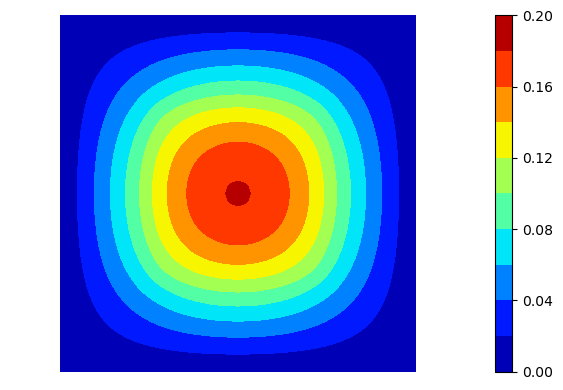

In [22]:
#===Plotting(2d)===
fig = plt.figure( dpi = 100 ) # dots per inch
fig.set_size_inches(6,4)
clb = plt.contourf(X,Y, u_new, 10, cmap = 'jet')



#plt.colorbar()
plt.colorbar()
plt.clim(0,0.2)
plt.ylabel('y')
plt.xlabel('x')
plt.axis('equal')
plt.axis('off')
plt.tight_layout()
        
    
    

In [26]:

#Gauss–Seidel Method
import numpy as np
import matplotlib.pyplot as plt

nx = 50 # total 50 intervals
ny = 50 # total 50 intervals
L = 2. # meters
h = L/(nx)
x = np.linspace(-1,1,nx+1)
y = np.linspace(-1,1,ny+1)
X, Y = np.meshgrid(x,y)
RED = 0 # even gridpoints
BLACK = 1 # odd gridpoints


#===
def AssignSource_f(nx,ny,h):
    f_arr = np.zeros([nx+1, ny+1])
    for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = i * h - 1. # x position
            pos_y = j * h - 1. # y position
            if ((pos_x - 0.5)*(pos_x + 0.5)<=0) and ((pos_y - 0.5)*(pos_y + 0.5)<=0):
                f_arr[i,j] = 1.
    return f_arr




#===
u_arr = np.zeros([nx+1,ny+1])
f_arr = AssignSource_f(nx,ny,h)
Iter_Max = 5000
for iter in range(Iter_Max):
    res = 0.
    for i in range(1,nx):
        for j in range(1,ny):
            if ((i+j)%2 == BLACK):
                f_val = f_arr[i,j]
                u_right = u_arr[i+1,j]
                u_left = u_arr[i-1,j]
                u_top = u_arr[i,j+1]
                u_bottom = u_arr[i,j-1]
                u_val = u_arr[i,j]
                temp = (u_right + u_left + u_top + u_bottom - 4. * u_val)/h**2. + f_val
                delta = abs(temp)
                u_arr[i,j] = (u_right + u_left + u_top + u_bottom + h**2 * f_val)/4.0
                res = max(res,abs(delta))            
    #=====    
    for i in range(1,nx):
        for j in range(1,ny):
            if ((i+j)%2 == RED):
                f_val = f_arr[i,j]
                u_right = u_arr[i+1,j]
                u_left = u_arr[i-1,j]
                u_top = u_arr[i,j+1]
                u_bottom = u_arr[i,j-1]
                u_val = u_arr[i,j]
                temp = (u_right + u_left + u_top + u_bottom - 4. * u_val)/h**2. + f_val
                delta = abs(temp)
                u_arr[i,j] = (u_right + u_left + u_top + u_bottom + h**2 * f_val)/4.0
                res = max(res,abs(delta))     
    if iter%1000 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res)) 

print ("okay")




iter = 0, res = 2.00e+00
iter = 1000, res = 3.12e-02
iter = 2000, res = 6.00e-04
iter = 3000, res = 1.15e-05
iter = 4000, res = 2.22e-07
okay


In [28]:




#SOR Method
import numpy as np
import matplotlib.pyplot as plt

nx = 50 # total 50 intervals
ny = 50 # total 50 intervals
L = 2. # meters
h = L/(nx)
x = np.linspace(-1,1,nx+1)
y = np.linspace(-1,1,ny+1)
X, Y = np.meshgrid(x,y)
RED = 0 # even gridpoints
BLACK = 1 # odd gridpoints

omega = 1.5

#===
def AssignSource_f(nx,ny,h):
    f_arr = np.zeros([nx+1, ny+1])
    for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = i * h - 1. # x position
            pos_y = j * h - 1. # y position
            if ((pos_x - 0.5)*(pos_x + 0.5)<=0) and ((pos_y - 0.5)*(pos_y + 0.5)<=0):
                f_arr[i,j] = 1.
    return f_arr




#===
u_arr = np.zeros([nx+1,ny+1])
f_arr = AssignSource_f(nx,ny,h)
Iter_Max = 5000
for iter in range(Iter_Max):
    res = 0.
    for i in range(1,nx):
        for j in range(1,ny):
            if ((i+j)%2 == BLACK):
                f_val = f_arr[i,j]
                u_right = u_arr[i+1,j]
                u_left = u_arr[i-1,j]
                u_top = u_arr[i,j+1]
                u_bottom = u_arr[i,j-1]
                u_val = u_arr[i,j]
                temp = (u_right + u_left + u_top + u_bottom - 4. * u_val)/h**2. + f_val
                delta = abs(temp)
                u_GS = (u_right + u_left + u_top + u_bottom + h**2 * f_val)/4.0
                u_arr[i,j] = (1. - omega ) * u_arr[i,j] + omega * u_GS
                res = max(res,abs(delta))            
    #=====    
    for i in range(1,nx):
        for j in range(1,ny):
            if ((i+j)%2 == RED):
                f_val = f_arr[i,j]
                u_right = u_arr[i+1,j]
                u_left = u_arr[i-1,j]
                u_top = u_arr[i,j+1]
                u_bottom = u_arr[i,j-1]
                u_val = u_arr[i,j]
                temp = (u_right + u_left + u_top + u_bottom - 4. * u_val)/h**2. + f_val
                delta = abs(temp)
                u_GS = (u_right + u_left + u_top + u_bottom + h**2 * f_val)/4.0
                u_arr[i,j] = (1. - omega ) * u_arr[i,j] + omega * u_GS
                res = max(res,abs(delta))     
    if iter%1000 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res)) 

print ("okay")









iter = 0, res = 2.50e+00
iter = 1000, res = 2.13e-05
iter = 2000, res = 1.38e-10
iter = 3000, res = 2.37e-13
iter = 4000, res = 3.06e-13
okay


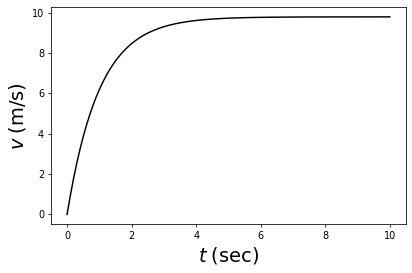

In [32]:





import numpy as np
import matplotlib.pyplot as plt
m = 1.0 # kg
g = 9.8 #m/s^2
v_0 = 0. #m/s
beta = 1.0 #1/s
Nt = 100 # number of discrete time intervals
t_arr = np.linspace(0,10,Nt+1)
v_arr = m *g/beta + (v_0 - m*g/beta) *np.exp(-beta * t_arr/m)


fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(t_arr, v_arr,'-k',label = 'Analytic Solution')
plt.xlabel(r'$t\;(\rm sec)$',fontsize = 20)
plt.ylabel(r'$v\;(\rm m/s)$', fontsize = 20)
plt.tight_layout()




# Unit 5.1b: Drag equation -- Euler method (numerical solution)

$$\frac{dv}{dt}=f\left(v,t\right) \Rightarrow \ \frac{v\left(t_n+h\right)-v\left(t_n\right)}{h}=f\left(v_n,t_n\right)$$

$$v_{n+1}= v_n+hf\left(v_{n}, t_n\right)$$


- Euler method: 
\begin{equation}
v^{Euler}_{n+1}=v_{n}+K_{1} = v_n + h\left( g -\frac{\beta}{m} v_n\right),
\end{equation}






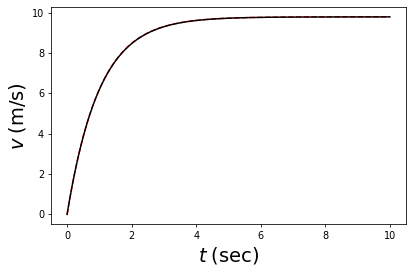

In [42]:
Nt = 1000 # grid points  # number of discrete time intervals
total_time = 10. # seconds
v_arr = np.zeros(Nt+1)
t_arr = np.linspace(0,total_time,Nt+1)
h = float(total_time) / Nt # time step size
m = 1.0 # kg
g = 9.8 #m/s^2
beta = 1.0 #1/s
v_0 = 0. #m/s

v_arr[0] = v_0
for n in range(Nt):
    v_n = v_arr[n]
    v_arr[n+1] = v_n + h * (g - beta/m * v_n)

#===
fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(t_arr, v_arr,'--r',label = 'Numerical Solution')
#===
v_analytic = m *g/beta + (v_0 - m*g/beta) *np.exp(-beta * t_arr/m)
plt.plot(t_arr, v_analytic,'-k',label = 'Analytical Solution')

plt.xlabel(r'$t\;(\rm sec)$',fontsize = 20)
plt.ylabel(r'$v\;(\rm m/s)$', fontsize = 20)
plt.tight_layout()

    